#**Understanding the data:**
We're going to be looking at data about real estate.

**When was this data  aquired?**
The data was collecetd between June 5, 2014 to June 12,2014. The dataset ranges from May 1, 2014, to July 9, 2014.

**Where was this data aquired form?**
The data's georgically is based in the USA and more specifically the cities in  state of washington.

**How was this data Aquired?**
The method used to quire this data was collection emthdology. This gives us the idea that the author ysed puvlic records such as websites like zillow.com and other safe real estate recrods that are abilable  for the public.
what are the atrributes for this data? Within this data set you sell that theres a mixure of categroical ordinala nd numbeircal values.
This data set has a total of 18 attributes.
1. Date: The date when the property was sold. This feature helps in understanding the temporal trends in property prices.**(categorical)**
2. Price:The sale price of the property in USD.**(Numerical**)
3. Bedrooms:The number of bedrooms in the property. Generally, properties with more bedrooms tend to have higher prices.**(Numerical)**
4. Bathrooms: The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.**(Numerical)**
5. Sqft Living: The size of the living area in square feet. Larger living areas are typically associated with higher property values.**(Numerical)**
6. Sqft Lot:The size of the lot in square feet. Larger lots may increase a property’s desirability and value.**(Numerical**)
7. Floors: The number of floors in the property. Properties with multiple floors may offer more living space and appeal.**(Numerical)**
8. Waterfront: A binary indicator (1 if the property has a waterfront view, 0 other-wise). Properties with waterfront views are often valued higher.**(categorical)**
9. View: An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.**(ordinal)**
10. Condition: An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.**(ordinal)**
11. Sqft Above: The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.**(Numerical)**
12. Sqft Basement: The square footage of the basement. Basements may add value depending on their usability.**(Numerical)**
13. Yr Built: The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.**(Numerical)**
14. Yr Renovated: The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.**(Numerical)**
15. Street: The street address of the property. This feature can be used to analyze location-specific price trends.**(categorical)**
16. City: The city where the property is located. Different cities have distinct market dynamics.**(categorical)**
17.Statezip: The state and zip code of the property. This feature provides regional context for the property.**(categorical)**
18. Country: The country where the property is located.
**(categorical)**

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fratzcan/usa-house-prices")

import pandas as pd

def read_csv_from_path(file_path):
    try:
        df = pd.read_csv(file_path)

        return df
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None

# Example usage
file_path = path+"/USA Housing Dataset.csv"  # Update with your actual file path
print(file_path)
T1 = read_csv_from_path(file_path)

T1.head()

/root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1/USA Housing Dataset.csv


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


# **Data summary and instiful sights:**

In [22]:
print(T1.columns.tolist())  # Shows all column names
# Example: If columns are 'price', 'bedrooms', 'sqft_living'...
numerical_cols = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated'
]
import pandas as pd

# Check current columns
print("Columns in dataset:", T1.columns.tolist())

# Update numerical_cols based on actual columns
numerical_cols = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated'  # Adjust names as needed!
]

# Verify columns exist
missing_cols = [col for col in numerical_cols if col not in T1.columns]
if missing_cols:
    print(f"⚠️ Warning: These columns are missing: {missing_cols}")
else:
    # Proceed with calculations
    stats = T1[numerical_cols].describe(include='all').transpose()
    stats['range'] = stats['max'] - stats['min']
    stats['mode'] = T1[numerical_cols].mode().iloc[0]  # Get first mode
    print("📊 Statistical Summary:")
    display(stats)




['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
Columns in dataset: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
📊 Statistical Summary:


,count,mean,std,min,25%,50%,75%,max,range,mode
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00,26590000.00,0.0
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00,8.00,3.0
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75,6.75,2.5
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00,9670.00,1720.0
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00,1073580.00,5000.0
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50,2.50,1.0
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00,7650.00,1200.0
sqft_basement,4140.0,312.287440,464.349222,0.0,0.00,0.00,602.5,4820.00,4820.00,0.0
yr_built,4140.0,1970.814010,29.807941,1900.0,1951.00,1976.00,1997.0,2014.00,114.00,2005.0
yr_renovated,4140.0,808.368357,979.380535,0.0,0.00,0.00,1999.0,2014.00,2014.00,0.0


# **Checking to see if there are missing/empty values for attributes we've done statistical calculations on:**

In [23]:
# 1. Check for missing values
missing_values = T1[numerical_cols].isnull().sum()
print("🔍 Missing Values per Column:")
print(missing_values[missing_values > 0])  # Only show columns with missing data

🔍 Missing Values per Column:
Series([], dtype: int64)


# **visualizations:**

Here we've used a** histogram**, the hiostogram has a right skwed distrubutions which means that most homes in our data set are cosnidered to be afforable, with the exception of outliers. The outliers can be identifed with the tail moving torwads the right.   

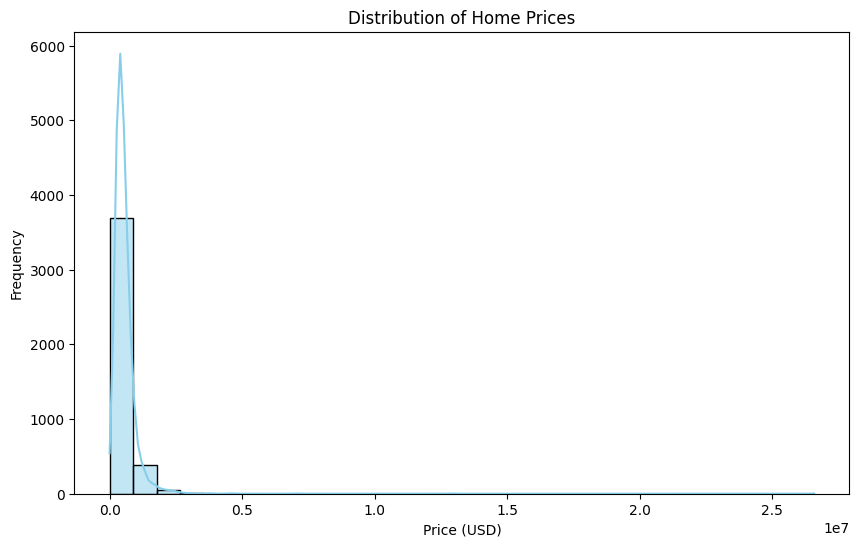

In [24]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib
import seaborn as sns
import numpy as np
plt.figure(figsize=(10, 6))
sns.histplot(T1['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Home Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


**Scatter plot** to see if there's a relatiosnhip between the **year a home was built and it's price**.** Are newer or homes mor expensive or are older homes more expenisve?**
Based on the scatter plot below there  seems to be  a pretty good balance in teh price oh homes that are older and newer, aside from some outliers where an olde home quite more expenive and that could be due to may factors. For example it may be of hostorical importance or location.


<Axes: xlabel='yr_built', ylabel='price'>

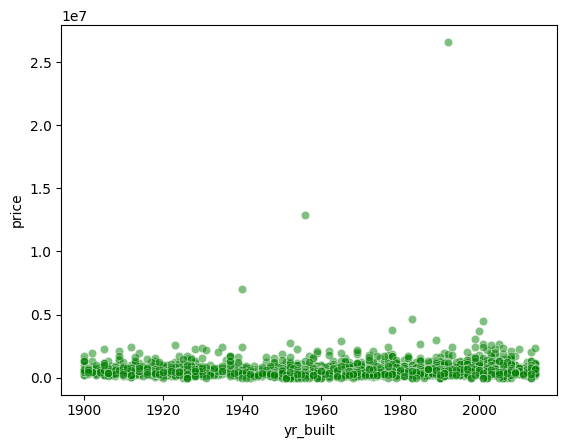

In [25]:
sns.scatterplot(x='yr_built', y='price', data=T1, alpha=0.5, color='green')

Here we're using another  **scatter plot** to identify if the bigger the home is the more money it cost. If we have a **postaive corrletaion **(menaing there's an upward trend) that indictaes that larger homes usalley cost more. But if there's **no corrletaion** then that may indicate that there isnt as strong of a rletionbship
 between home sqr ft and home price.
In our scatter plot there seems to be a postaive correlation.

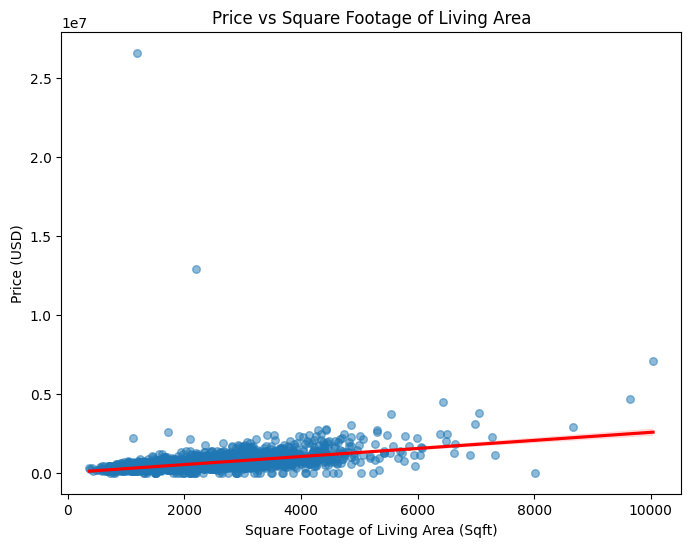

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=T1['sqft_living'], y=T1['price'], scatter_kws={'alpha': 0.5, 's': 30}, line_kws={'color': 'red'})

# Labels and title
plt.title("Price vs Square Footage of Living Area")
plt.xlabel("Square Footage of Living Area (Sqft)")
plt.ylabel("Price (USD)")

# Show plot
plt.show()


# **Expanding Investment Knowledge:**



This dataste could be extremly informative when cretaing a stragey for investing, here's why.
To start, I've gotten this data set from, Kaggle and it's aboutinterest rates :
(link)**US Real Estate & Interest Rates (Census & FRED)**
This data set would be useful for a number of reasons. Mortgage rates are directly connected with interest, when interest rates start lower it's a great time to buy a house because it's cheaper for buyers to borrow money and vice versa.

One way it compliments my data set is it makes seeing  patterns of when to buy a home  when it's affordable for a buyer. This gives a buyer some structure of when to buy home , how much  time they have to save until the next predicted drop in interest rate is.
